<a href="https://colab.research.google.com/github/Enadiakhere/Decision-Making/blob/main/Data%20Science%20and%20Decision_Making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A model to predict stress using signals

### Import necessary libraries and models

In [33]:
from datetime import datetime
import pandas as pd

### Import dataset

In [34]:
#This is the raw data that is been imported.
url = 'https://raw.githubusercontent.com/Enadiakhere/CE888-2023/main/CleanedData/IBIData/IBI13processed.csv'
df = pd.read_csv(url)
print(df.head(5))

   Participant        IBI        Time  Label
0           13  23.500000  1645442648      0
1           13  24.390625  1645442649      0
2           13  25.328125  1645442650      0
3           13  26.187500  1645442651      0
4           13  27.140625  1645442651      0


### Data Preprocessing

#### Rename columns

In [35]:
df.rename(columns = {'1645442647':'IBI', ' IBI':'Secs'}, inplace = True)
df.head()

,Participant,IBI,Time,Label
0,13,23.500000,1645442648,0
1,13,24.390625,1645442649,0
2,13,25.328125,1645442650,0
3,13,26.187500,1645442651,0
4,13,27.140625,1645442651,0


#### Let us manipulate the (Timestamp) Time column to get the actual time for each event.

In [36]:
x = df['Time']

In [37]:
df['Date'] = pd.to_datetime(x,unit='s')
df.head()

,Participant,IBI,Time,Label,Date
0,13,23.500000,1645442648,0,2022-02-21 11:24:08
1,13,24.390625,1645442649,0,2022-02-21 11:24:09
2,13,25.328125,1645442650,0,2022-02-21 11:24:10
3,13,26.187500,1645442651,0,2022-02-21 11:24:11
4,13,27.140625,1645442651,0,2022-02-21 11:24:11


#### Separate the date and time information

In [38]:
df_date_and_time = df['Date'].dt.strftime("%d-%m-%y %H:%M").str.split(" ", expand=True)
df_date_and_time

,0,1
0,21-02-22,11:24
1,21-02-22,11:24
2,21-02-22,11:24
3,21-02-22,11:24
4,21-02-22,11:24
...,...,...
2043,21-02-22,11:54
2044,21-02-22,11:54
2045,21-02-22,11:54
2046,21-02-22,11:54


#### Rename the new columns

In [39]:
df_date_and_time.rename(columns = {0:'Day', 1:'Time'}, inplace = True)
df_date_and_time.head()

,Day,Time
0,21-02-22,11:24
1,21-02-22,11:24
2,21-02-22,11:24
3,21-02-22,11:24
4,21-02-22,11:24


#### Create a list for the various time of the stress based activities for the dataset for labeling the different data points

In [40]:
stroop = ['11:35','11:36','11:37','11:38','11:39','11:40','11:41','11:42']
interview = ['11:48','11:49','11:50','11:51','11:52','11:53','11:54','11:55','11:58','11:56','11:57']
hyp = ['12:03','12:04','12:05']

#### Create a Label column for annotation

In [41]:
df_date_and_time['label'] = 0
df_date_and_time.head()

,Day,Time,label
0,21-02-22,11:24,0
1,21-02-22,11:24,0
2,21-02-22,11:24,0
3,21-02-22,11:24,0
4,21-02-22,11:24,0


#### Let us check whether each signal happened during a stress-based task or not

In [42]:
pattern = '|'.join(stroop)     # joining list for comparision
IScritical=df_date_and_time['Time'].str.contains(pattern,case=False)
df_date_and_time['label'] = IScritical.replace((True,False), (1,df_date_and_time['label']))

pattern = '|'.join(interview)     # joining list for comparision
IScritical=df_date_and_time['Time'].str.contains(pattern,case=False)
df_date_and_time['label'] = IScritical.replace((True,False), (1,df_date_and_time['label']))

pattern = '|'.join(hyp)     # joining list for comparision
IScritical=df_date_and_time['Time'].str.contains(pattern,case=False)
df_date_and_time['label'] = IScritical.replace((True,False), (1,df_date_and_time['label']))

#### Check class distribution

In [43]:
print(df_date_and_time['label'].value_counts())

0    1080
1     968
Name: label, dtype: int64


#### Create a new dataframe for the processed data

In [44]:
df_final = pd.DataFrame()
#Copy the IBI and Time column from the original dataframe
df_final = df[['IBI', 'Time']].copy()
#Attach the label column
df_final['Label'] = df_date_and_time['label']
# Add the participant number
df_final['Participant']= 13
df_final.head()

,IBI,Time,Label,Participant
0,23.500000,1645442648,0,13
1,24.390625,1645442649,0,13
2,25.328125,1645442650,0,13
3,26.187500,1645442651,0,13
4,27.140625,1645442651,0,13


#### Rearrange the columns

In [45]:
cols = ['Participant', 'IBI', 'Time', 'Label']
df_final = df_final[cols]
df_final.head()

,Participant,IBI,Time,Label
0,13,23.500000,1645442648,0
1,13,24.390625,1645442649,0
2,13,25.328125,1645442650,0
3,13,26.187500,1645442651,0
4,13,27.140625,1645442651,0


#### Export the new dataset as csv

In [46]:
df_final.to_csv('https://raw.githubusercontent.com/Enadiakhere/CE888-2023/main/CleanedData/IBIData/IBI13processed.csv', index=False)

## Model Building

#### Import the required datasets

In [47]:
#Import each instance of data
df1=pd.read_csv('https://raw.githubusercontent.com/Enadiakhere/CE888-2023/main/CleanedData/IBIData/IBI01processed.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/Enadiakhere/CE888-2023/main/CleanedData/IBIData/IBI25processed.csv')
df3=pd.read_csv('https://raw.githubusercontent.com/Enadiakhere/CE888-2023/main/CleanedData/IBIData/IBI27processed.csv')
df4=pd.read_csv('https://raw.githubusercontent.com/Enadiakhere/CE888-2023/main/CleanedData/IBIData/IBI33processed.csv')
merged_df=pd.concat ([df1, df2, df3, df4])

#### Combine the entire datasets into one

In [48]:
dfComb = pd.concat([df1,df2], axis=0, ignore_index=True)
dfComb.head()

,Participant,IBI,Time,Label
0,1,35.484375,1644226062,0
1,1,36.343750,1644226063,0
2,1,37.296875,1644226064,0
3,1,38.187500,1644226065,0
4,1,39.046875,1644226065,0


#### Export the new dataset

In [49]:
dfComb.to_csv('https://raw.githubusercontent.com/Enadiakhere/CE888-2023/main/CleanedData/IBIData/finaldata.csv', index=False)

## Import dataset to model if using a fresh data

In [50]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Enadiakhere/CE888-2023/main/CleanedData/IBIData/finaldata.csv")
df2.head()

,Participant,IBI,Time,Label
0,1,35.484375,1644226062,0
1,1,36.343750,1644226063,0
2,1,37.296875,1644226064,0
3,1,38.187500,1644226065,0
4,1,39.046875,1644226065,0


### Import some more libraries

In [51]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Make a copy of the dataset

In [52]:
df = df2
df.head()

,Participant,IBI,Time,Label
0,1,35.484375,1644226062,0
1,1,36.343750,1644226063,0
2,1,37.296875,1644226064,0
3,1,38.187500,1644226065,0
4,1,39.046875,1644226065,0


#### Find missing values

In [53]:
# find the null values
df2.isnull().sum()

Participant    0
IBI            0
Time           0
Label          0
dtype: int64

#### Drop unnecessary columns

The participant column will not contribute any meaning to the modelling so we need to remove it.

In [54]:
# drop unnecessary columns
cols = ['Participant']
df2.drop(columns=cols, axis=1, inplace=True)
df2.head()

,IBI,Time,Label
0,35.484375,1644226062,0
1,36.343750,1644226063,0
2,37.296875,1644226064,0
3,38.187500,1644226065,0
4,39.046875,1644226065,0


#### Splitting the data for Training and Testing

In [ ]:
# We need to specify input and output attributes
X = df2.drop(columns=['Label'], axis=1)
y = df2['Label']
X.head()

,HR,Time
0,1.00,1644226072
1,83.00,1644226073
2,83.00,1644226156
3,72.67,1644226239
4,87.00,1644226312


#### Split into train and test set set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Our Classification function with cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
def ClassificationModel(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

### Fitting a Logistic Regression Model for classification

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
ClassificationModel(model, X, y)

Accuracy is 98.34508121360712
Cross validation is 98.03861646350323


### Standardized the dataset

In [ ]:
#Import the required library
from sklearn.preprocessing import StandardScaler

In [ ]:
scale= StandardScaler()
 
# let us separate the independent and dependent variables


X_data = X
target = y
 
# standardization of dependent variables
scaled_data = scale.fit_transform(X_data) 
scaled_data

array([[-7.38984745, -1.77341282],
       [ 0.65109538, -1.77341185],
       [ 0.65109538, -1.77333198],
       ...,
       [ 0.75111686,  0.9974652 ],
       [ 0.74719445,  0.99754603],
       [ 0.74915566,  0.99762686]])

#### With Scaled Data

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
ClassificationModel(model, scaled_data, y)

Accuracy is 98.34508121360712
Cross validation is 98.03861646350323


### Fitting a Random Forest classification model

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
ClassificationModel(model, X, y)

Accuracy is 99.11124731841863
Cross validation is 69.71077272547181


#### With Scaled Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
ClassificationModel(model, scaled_data, y)

Accuracy is 98.98866074164879
Cross validation is 69.1438461798081


### Fitting a Decision Tree classification model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
ClassificationModel(model, X, y)

Accuracy is 99.01930738584124
Cross validation is 54.5942321830276


#### With Scaled Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
ClassificationModel(model, scaled_data, y)

Accuracy is 99.08060067422618
Cross validation is 54.617211884291486


We see from the above that the Random Forest model with standardized data performed far better among the various classification models fitted. The poorest performance is using Logistic Regression.

## Hyperparameter tuning
We can improve our models through hyperparameter tuning. Let us do this with the Random Forest classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
ClassificationModel(model, X, y)

Accuracy is 98.37572785779956
Cross validation is 79.41739853933623


In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
ClassificationModel(model, scaled_data, y)

Accuracy is 100.0
Cross validation is 74.71055342576798


We notice from the cross validation result that the model improved when we tunned the parameter.

#### Confusion Matrix

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
conMat = confusion_matrix(y_test, y_pred)
conMat

array([[1042,    0],
       [   1,  986]], dtype=int64)

#### Let us visualize the confusion matrix using a heat map

<AxesSubplot:>

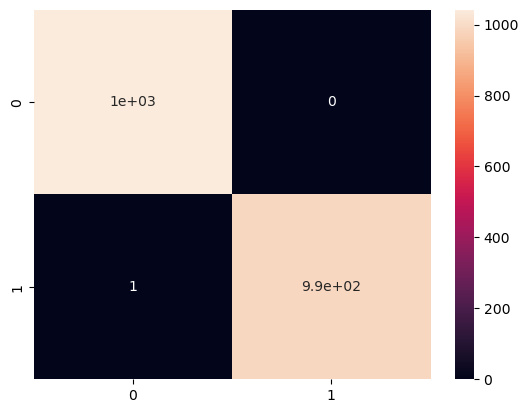

In [ ]:
sns.heatmap(conMat, annot=True)

## Testing the model on new and alien data

#### Imprt testing data set

In [ ]:
x_test = pd.read_csv("E:\Downloads\Compressed\Stress-Predict-Dataset-main\CleanedData/testdata.csv")

#### Drop the unnecessary columns

In [ ]:
# specify input and output attributes
X_test = x_test.drop(columns=['Label','Participant'], axis=1)
y_test = x_test['Label']
X_test.head()

,IBI,Time
0,20.656250,1644233390
1,21.406250,1644233390
2,22.140625,1644233391
3,22.843750,1644233392
4,23.546875,1644233393


#### Run the model on the train data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
ClassificationModel(model, X, y)

Accuracy is 99.9507146377526
Cross validation is 89.50437673954153


#### Create a prediction for the test data

In [ ]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Export the prediction with the labels

In [ ]:
dfresult = pd.DataFrame(data={"col1": pred})
dfresult.to_csv("E:\Downloads\Compressed\Stress-Predict-Dataset-main\CleanedData/prediction.csv", sep=',',index=False)